In [1]:
# Notebook: Venn DMPs in TSS
# Description: Notebook contains analysis of overlapping DMPs [and annotated genes] localized in
# TSS200 or TSS1500 between all study groups.

In [2]:
%load_ext lab_black

In [3]:
import math
import itertools

import pandas as pd
from venn import venn

import numpy as np, scipy.stats as st
from src.enrichment_analysis import EnrichmentAnalysis
from src.utils import EPIC

pd.options.mode.chained_assignment = None

In [4]:
def extract(df, threshold=0.1, alpha=0.05):
    """Function to extract CpGs from report"""
    df = df[(df["Delta mean"].abs() > threshold) & (df["q-value"] <= alpha)]

    return set(df.index)

In [5]:
# Load raw reports

# Covid groups vs healthy blood controls
spain = pd.read_csv("output/SpainCoV_vs_HB_TSS.csv", index_col=0)
usa = pd.read_csv("output/USACoV_vs_HB_TSS.csv", index_col=0)
pl = pd.read_csv("output/PLCoV_vs_HB_TSS.csv", index_col=0)

# usa covid vs usa non-covid controls
nonCov = pd.read_csv("output/USANoNCoV_vs_CoV_TSS.csv", index_col=0)

In [6]:
# Intersection between Covid groups USA SPAIN PL

In [7]:
intersect = set.intersection(set(spain.index), set(pl.index), set(usa.index))

spain = extract(spain.loc[intersect])
pl = extract(pl.loc[intersect])
usa = extract(usa.loc[intersect])

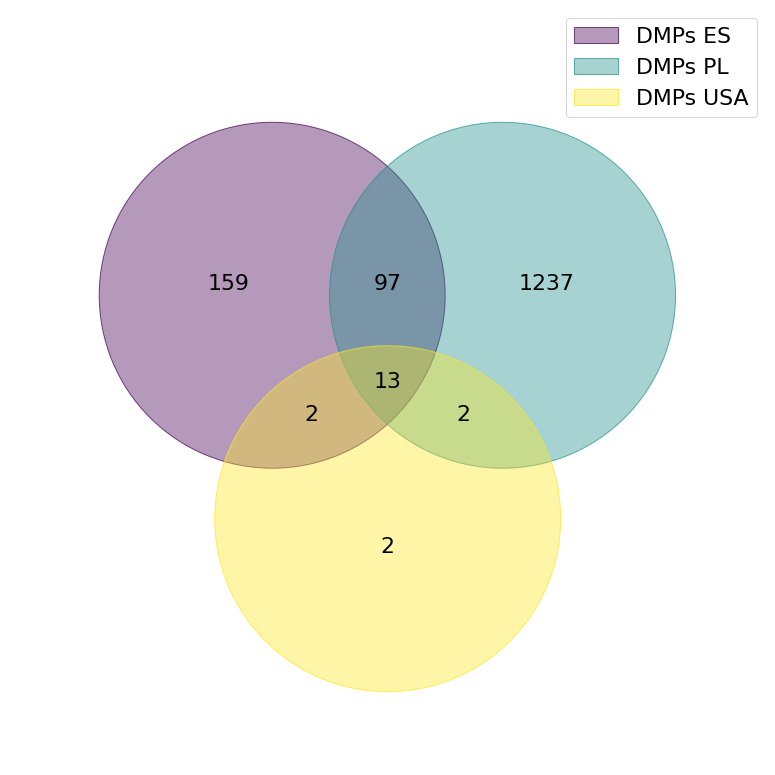

In [8]:
fig = venn(
    {
        "DMPs ES": spain,
        "DMPs PL": pl,
        "DMPs USA": usa,
    },
    figsize=(14, 14),
    fontsize=22,
)

fig.figure.savefig("../Plots/VennAllCoVGroupsTSS.jpg")

In [9]:
# Save intersection

intersection = list(set.intersection(spain, pl, usa))

intersection = pd.DataFrame(intersection, columns=["CpG"])
print(intersection)

intersection.to_csv("../Files/DMPsInAllCoVGroupsTSS.csv")

           CpG
0   cg13407664
1   cg03782202
2   cg25060243
3   cg22930808
4   cg17515347
5   cg19556901
6   cg18642567
7   cg21581312
8   cg24315703
9   cg21673175
10  cg08585897
11  cg21465162
12  cg12981595


In [16]:
# Overlap genes annotated to DMPs betwen covid groups

In [10]:
# Load epic manifest

epic = pd.read_csv(
    "../data/Additional/EPIC/MethylationEPIC_v-1-0_B4.csv",
    index_col=0,
    low_memory=False,
)

In [17]:
# Extract genes annotated to DMPs


# Spain
spain_selected_genes = EPIC.extract_genes(
    epic.loc[spain, "UCSC_RefGene_Name"]
)  # Extract genes

# PL
pl_selected_genes = EPIC.extract_genes(epic.loc[pl, "UCSC_RefGene_Name"])

# USA
usa_selected_genes = EPIC.extract_genes(epic.loc[usa, "UCSC_RefGene_Name"])

# Convert to set

spain_selected_genes = set(spain_selected_genes.Genes)
pl_selected_genes = set(pl_selected_genes.Genes)
usa_selected_genes = set(usa_selected_genes.Genes)

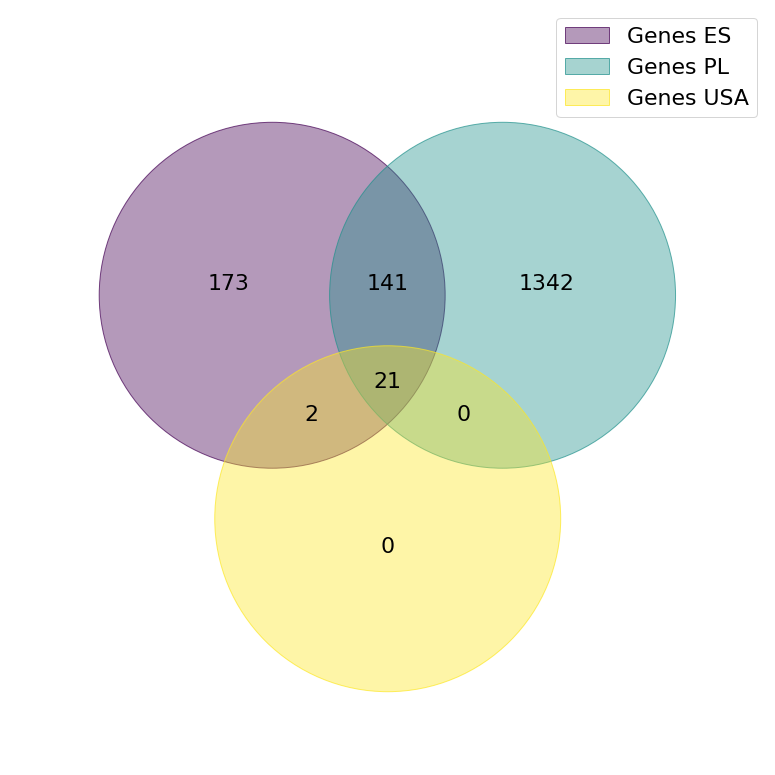

In [14]:
fig = venn(
    {
        "Genes ES": spain_selected_genes,
        "Genes PL": pl_selected_genes,
        "Genes USA": usa_selected_genes,
    },
    figsize=(14, 14),
    fontsize=22,
)

fig.figure.savefig("../Plots/VennDMGenesAllCoVGroups.jpg")

In [15]:
# Export intersection

In [16]:
summary = pd.concat(
    (epic.loc[intersection.CpG, ["UCSC_RefGene_Name", "UCSC_RefGene_Group"]],),
    axis=1,
)

summary.to_csv("../Files/DMGenesInAllCoVGroups.csv")
summary

UCSC_RefGene_Name  \
IlmnID                                                          
cg13407664                                               HTN1   
cg03782202                                             HOXD11   
cg25060243  UGT1A10;UGT1A6;UGT1A8;UGT1A6;UGT1A9;UGT1A4;UGT...   
cg22930808          PARP9;PARP9;DTX3L;PARP9;PARP9;PARP9;PARP9   
cg17515347                                               AIM2   
cg19556901                                         SNORD115-1   
cg18642567                                            RPGRIP1   
cg21581312                                          LOC723972   
cg24315703                                              LIMK2   
cg21673175                                          LOC401010   
cg08585897                                  KARS;TERF2IP;KARS   
cg21465162                                      UBQLN1;UBQLN1   
cg12981595                                           KRTAP4-8   

                                     UCSC_RefGene_Group  
IlmnID                                                   
cg13407664                                      TSS1500  
cg03782202                                      TSS1500  
cg25060243   Body;Body;Body;Body;Body;TSS1500;Body;Body  
cg22930808  5'UTR;5'UTR;TSS1500;5'UTR;5'UTR;5'UTR;5'UTR  
cg17515347                                      TSS1500  
cg19556901                                      TSS1500  
cg18642567                                      TSS1500  
cg21581312                                       TSS200  
cg24315703                                       TSS200  
cg21673175                                       TSS200  
cg08585897                           5'UTR;TSS1500;Body  
cg21465162                                TSS200;TSS200  
cg12981595                                       TSS200